In [1]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from numpy import nan as NaN

%load_ext autoreload
%autoreload 2

In [2]:
df_Sample = pd.read_excel('data/DZDB2.xlsx',sheet_name="Samples")
df_Data_detrital = pd.read_excel('data/DZDB2.xlsx',sheet_name="UPb_Data")

In [3]:
SedimentaryZircon = pd.merge(df_Sample,df_Data_detrital,on='Ref_Sample_Key')

In [4]:
SedimentaryZircon.columns

Index(['Sample_No.', 'Ref_Number', 'Ref_Sample_Key',
       'Ref No. In_Source_Database', 'Sample No. In_Source_Database',
       'Source_Database_x', 'Published Sample_ID', 'Country/State', 'Region',
       'Continent', 'Major Geographic-Geologic Description',
       'Minor Geologic-Geographic Unit', 'Locality', 'Latitude', 'Longitude',
       'Max. Depos. Age (Ma)', 'Est. Depos. Age (Ma)', 'Min. Depos. Age (Ma)',
       'Mineral', 'Mass Spectrometer', 'Spectrometer Location', 'Institution',
       'Spectrometer Model', 'Class-1 Rock Type', 'Class-2 Rock Type',
       'Class-3 Rock Type', 'Felsic/Mafic', 'Max Latitude', 'Min Latitude',
       'Max Longitude', 'Min Longitude', 'U-Pb Record Count',
       'U-Pb Record Count Standard_Model_Age', 'Grain_No.', 'Sample&Grain',
       'Core/Rim', 'Spot diam. (μm)', 'Standard_Model_Age',
       'Published 206Pb/238U age (Ma)', 'Published 206Pb/238U 2σ uncert.',
       'Published 207Pb/235U age (Ma)', 'Published 207Pb/235U 2σ uncert.',
       

In [5]:
df_60 = df_Sample
SedimentaryZircon = SedimentaryZircon

Sample_ID = df_60['Ref_Sample_Key']
Sample_ID = Sample_ID.to_list()

types=[]
colours=[]
for i in Sample_ID:
    Sample_age = SedimentaryZircon[SedimentaryZircon['Ref_Sample_Key'] == i]
    age_list = Sample_age['Standard_Model_Age']
    CA_DA = age_list - Sample_age['Est. Depos. Age (Ma)']
    CA_DA.dropna(inplace=True)
    CA_DA_Order = CA_DA.sort_values(ascending = True)
    
    if CA_DA_Order.iloc[int(len(CA_DA)*0.05)] >= 150:
        types.append('C')
        colours.append('g')
    elif CA_DA_Order.iloc[int(len(CA_DA)*0.3)] >= 100:
        types.append('B')
        colours.append('b')
    else:
        types.append('A')
        colours.append('r')
        
df_60['type']=types
df_60['colour']=colours



In [6]:
len(df_60)

6400

In [7]:
df_Sample_60 = df_60
df_Ref_detrital = pd.read_excel('data/DZDB2.xlsx',sheet_name="References")


In [8]:
with pd.ExcelWriter(r"data/DZDB3.xlsx") as writer:
    df_Ref_detrital.to_excel(writer,sheet_name='References',index = False)
    df_Sample_60.to_excel(writer,sheet_name='Samples',index = False)
    df_Data_detrital.to_excel(writer,sheet_name='UPb_Data',index = False)

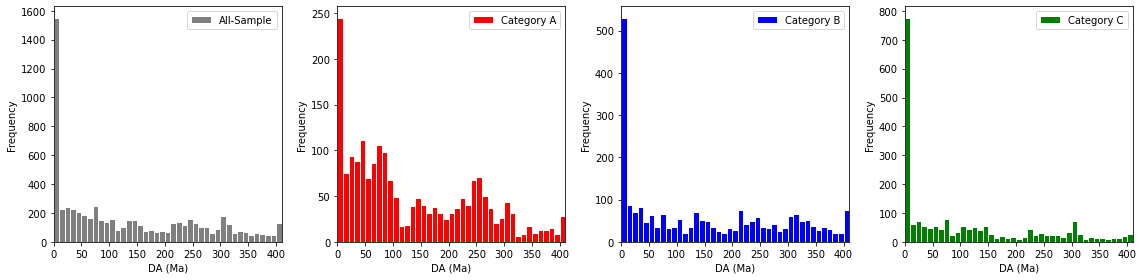

In [9]:
# show the distribution of samples in time
A_dataframe = df_Sample_60[df_Sample_60['type']=='A']
B_dataframe = df_Sample_60[df_Sample_60['type']=='B']
C_dataframe = df_Sample_60[df_Sample_60['type']=='C']

fig, ax = plt.subplots(1, 4, figsize = (16,4))
dataframe=[df_Sample_60,A_dataframe,B_dataframe,C_dataframe]
color = ['grey','r','b','g']
labels=['All-Sample','Category A','Category B','Category C']
for i in range(4):
    ax[i].hist(dataframe[i]['Est. Depos. Age (Ma)'], bins = range(0,420,10), histtype='bar', color = color[i], edgecolor='white', label=labels[i],stacked=True)

    ax[i].legend(loc = 'best')
    ax[i].set_xlabel('DA (Ma)')
    ax[i].set_ylabel('Frequency')
    #plt.xticks([])
    ax[i].set_xticks(range(0,500,50))
    #ax[i].set_yticks(range(0,80,20))
    ax[i].set_xlim(0,410)

plt.tight_layout()
plt.show()